Removemos longitud del dataset ya que al estar altamente correlacionado, no introduce información nueva.


In [1]:
from sklearn.datasets import fetch_california_housing

df_california = fetch_california_housing(as_frame=True).frame
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
new_df =df_california.drop(columns=['Longitude'])
new_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422


<Axes: >

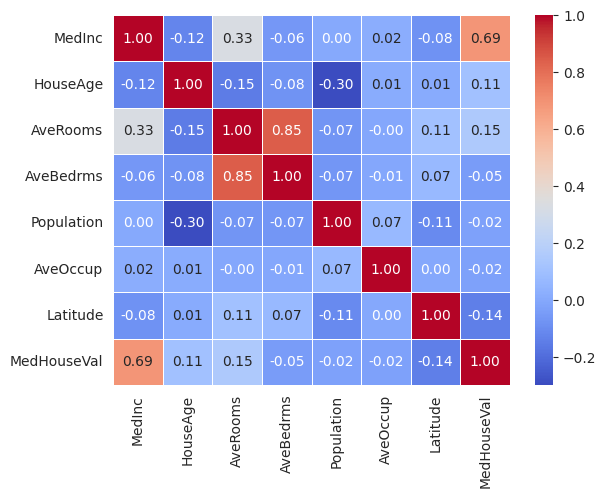

In [5]:
import seaborn as sns
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [7]:
updated_df =new_df.drop(columns=['AveBedrms'])
updated_df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422


<Axes: >

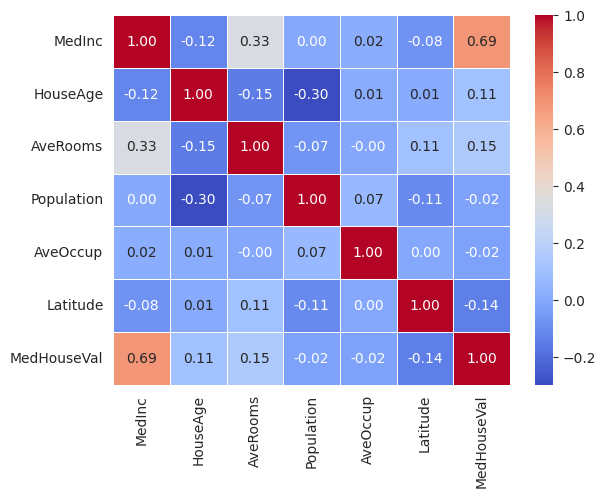

In [8]:
sns.heatmap(updated_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [11]:
def filter_outliers(df_to_filter):    
    fun_df = df_to_filter.copy()
    fun_df = fun_df[(0 <= fun_df["MedInc"]) & (fun_df["MedInc"] <= 14)] 
    fun_df = fun_df[(0 <= fun_df["AveRooms"]) & (fun_df["AveRooms"] <= 10)] 
    # fun_df = fun_df[(0.7 <= fun_df["AveBedrms"]) & (fun_df["AveBedrms"] <= 1.4)]
    fun_df = fun_df[(0 <= fun_df["Population"]) & (fun_df["Population"] <= 5000)]
    fun_df = fun_df[(0 <= fun_df["AveOccup"]) & (fun_df["AveOccup"] <= 6)]
    fun_df = fun_df[(0 <= fun_df["MedHouseVal"]) & (fun_df["MedHouseVal"] <= 4.99999999)]
    return fun_df

In [13]:
final_df = filter_outliers(updated_df)

<Axes: >

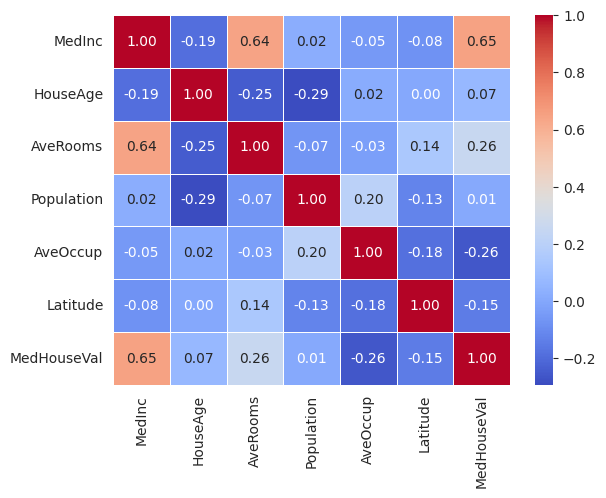

In [14]:
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)